# EDA

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgb2lab

In [4]:
base_path = "../data/dataset/EuroSAT/"
categories = os.listdir(base_path)

### Image composition

First and foremost, it's important to visualize the images and know the dimensions of them. As we can see in the example below, the images are of size 64x64 pixels with 3 spectral bands. To the human eye the resolution is quite deceibing, but we can get a lot of information from it.

(64, 64, 3)


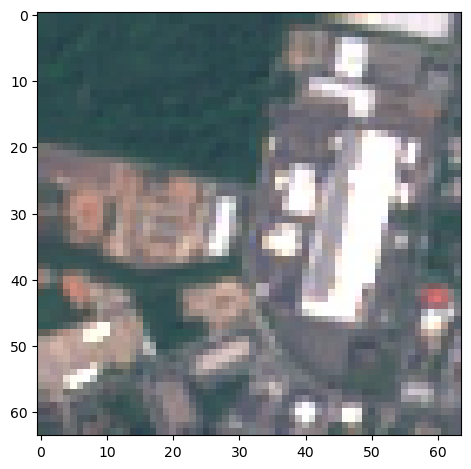

In [5]:
im = imread(base_path + "Industrial/Industrial_1.jpg")
print(im.shape)
imshow(im)

We can also convert the original image to diferent color contexts, like grayscale, black & white, cielab or hsv.

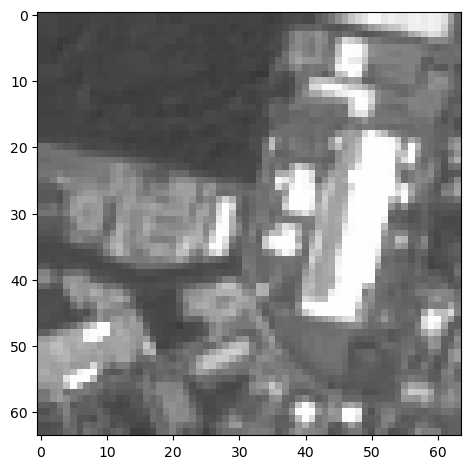

In [ ]:
#im_gray = rgb2gray(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

imshow(im_gray)

A part from the visual point of view, we need to know how the data of the image is structured in the different color spaces.

In [7]:
list(im_gray)

[array([ 70,  70,  69,  66,  66,  66,  67,  66,  68,  69,  68,  68,  66,
         68,  67,  69,  70,  72,  66,  67,  63,  64,  68,  68,  69,  68,
         67,  67,  66,  67,  67,  66,  68,  67,  63,  62,  66,  73,  74,
         77,  74,  73,  92, 101, 117, 142, 167, 197, 215, 228, 250, 248,
        230, 240, 234, 231, 239, 242, 234, 241, 236, 222, 158, 105],
       dtype=uint8),
 array([ 70,  70,  69,  66,  66,  66,  66,  66,  68,  69,  68,  68,  66,
         68,  67,  70,  70,  72,  66,  67,  63,  64,  68,  69,  69,  68,
         67,  67,  66,  67,  67,  66,  68,  67,  63,  61,  66,  72,  74,
         77,  74,  73,  92, 101, 117, 142, 167, 198, 215, 229, 251, 248,
        230, 240, 234, 231, 240, 243, 234, 241, 236, 222, 158, 105],
       dtype=uint8),
 array([ 69,  69,  69,  65,  66,  65,  62,  67,  71,  69,  66,  68,  65,
         65,  71,  73,  74,  71,  68,  70,  69,  71,  72,  64,  63,  63,
         62,  67,  65,  61,  64,  67,  67,  65,  65,  68,  71,  77,  88,
         97,  99,

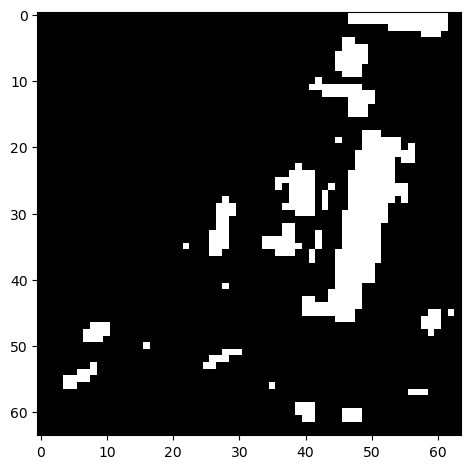

In [9]:
im_bw = im_gray > 255*0.75
imshow(im_bw)

In [10]:
list(im_bw)

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tr

In [12]:
#list(rgb2lab(im))
list(cv2.cvtColor(im, cv2.COLOR_RGB2LAB))

[array([[ 81, 115, 125],
        [ 80, 117, 123],
        [ 78, 118, 122],
        [ 76, 117, 121],
        [ 77, 115, 122],
        [ 76, 117, 121],
        [ 76, 119, 122],
        [ 76, 117, 123],
        [ 78, 116, 123],
        [ 80, 116, 124],
        [ 78, 117, 123],
        [ 77, 118, 122],
        [ 76, 117, 123],
        [ 78, 116, 123],
        [ 77, 117, 123],
        [ 78, 118, 122],
        [ 81, 116, 123],
        [ 82, 117, 123],
        [ 76, 117, 123],
        [ 76, 119, 122],
        [ 72, 118, 122],
        [ 73, 119, 122],
        [ 77, 119, 122],
        [ 78, 117, 123],
        [ 80, 115, 124],
        [ 79, 114, 125],
        [ 77, 116, 124],
        [ 76, 119, 122],
        [ 75, 119, 122],
        [ 77, 119, 122],
        [ 77, 119, 122],
        [ 75, 119, 122],
        [ 78, 117, 124],
        [ 77, 119, 122],
        [ 71, 121, 119],
        [ 70, 120, 119],
        [ 75, 119, 121],
        [ 83, 119, 122],
        [ 84, 118, 123],
        [ 88, 116, 123],


In [13]:
images = []
for cat in categories:
	files = os.listdir(base_path + cat)
	images.append(imread(base_path + cat + "/" + files[0]))

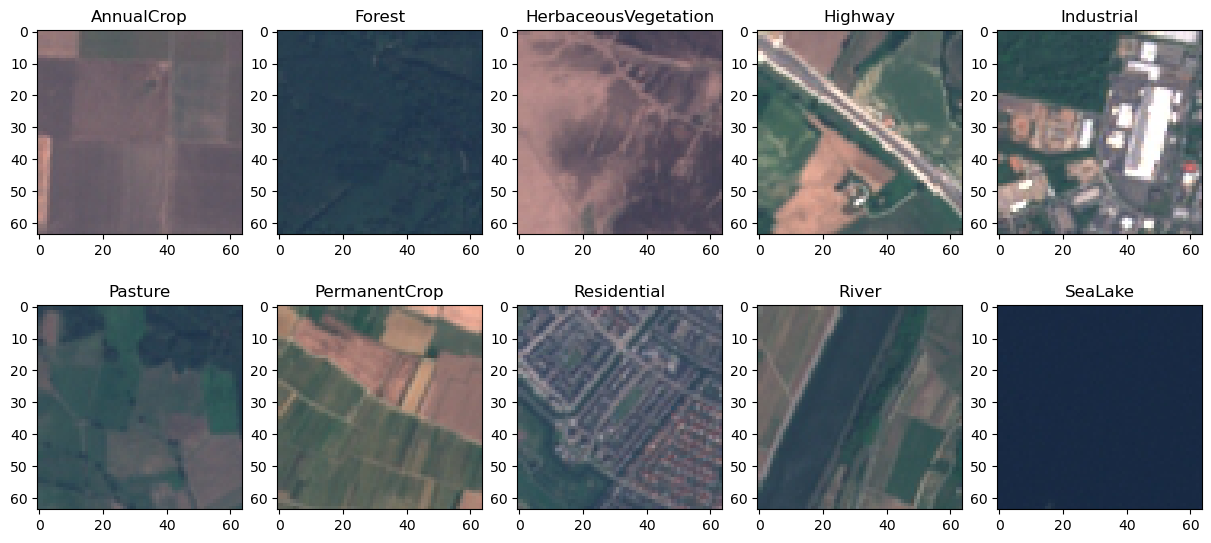

In [14]:
_, axs = plt.subplots(2, 5, figsize=(12, 5.5), layout="constrained")
axs = axs.flatten()
for i, cat in enumerate(categories):
	axs[i].imshow(images[i])
	axs[i].set_title(cat)
plt.show()

In [ ]:
_, axs = plt.subplots(2, 5, figsize=(12, 5.5), layout="constrained")
axs = axs.flatten()
for i, cat in enumerate(categories):
	axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))
	axs[i].set_title(cat)
plt.show()

In [ ]:
_, axs = plt.subplots(2, 5, figsize=(12, 5.5), layout="constrained")
axs = axs.flatten()
for i, cat in enumerate(categories):
	axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY) > 256*0.75)
	axs[i].set_title(cat)
plt.show()

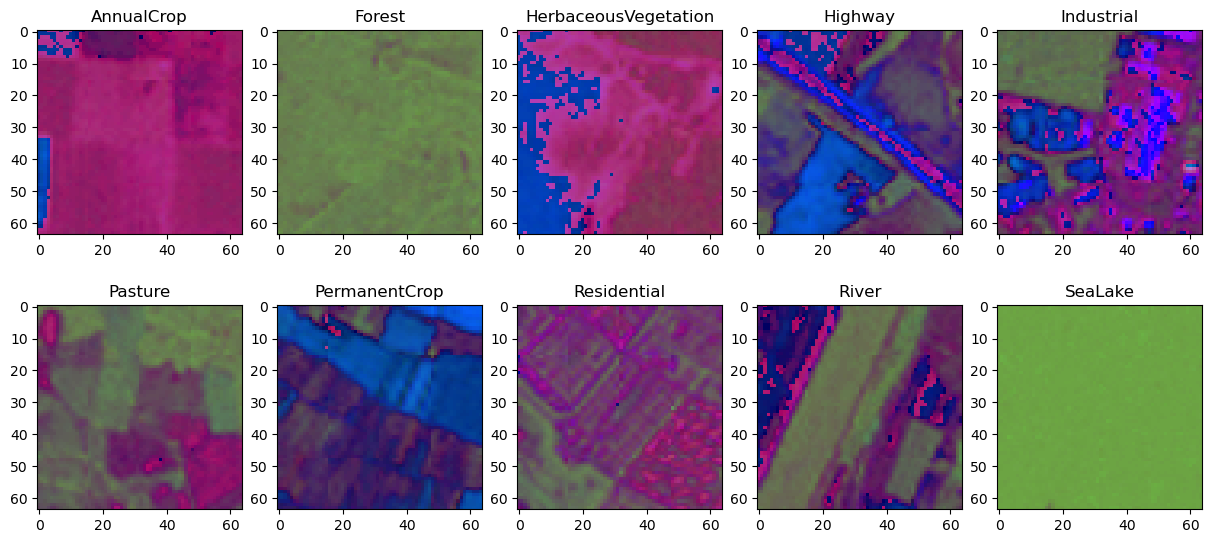

In [16]:
_, axs = plt.subplots(2, 5, figsize=(12, 5.5), layout="constrained")
axs = axs.flatten()
for i, cat in enumerate(categories):
	axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2HSV))
	axs[i].set_title(cat)
plt.show()

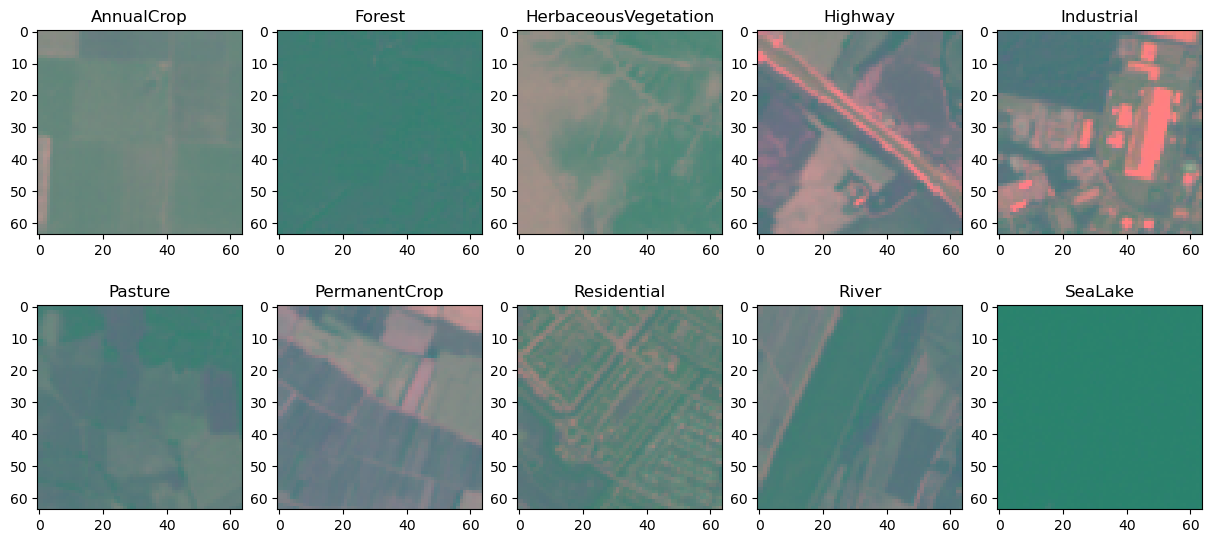

In [20]:
_, axs = plt.subplots(2, 5, figsize=(12, 5.5), layout="constrained")
axs = axs.flatten()
for i, cat in enumerate(categories):
	# axs[i].imshow((rgb2lab(images[i]) - rgb2lab(images[i]).min()) / (rgb2lab(images[i]).max() - rgb2lab(images[i]).min())) Normalized values for visualization (not accurate)
	axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2LAB))
	axs[i].set_title(cat)
plt.show()

If we show an example of each category in all the diferent color spaces that we want to work with, we can start to see some differences that may indicate that some categories will be easier to classify than others, since the information of the image is quite different from the rest of the categories. But as we know, that's the job of the algorithm, here it's important to identify how and which features we can extract.

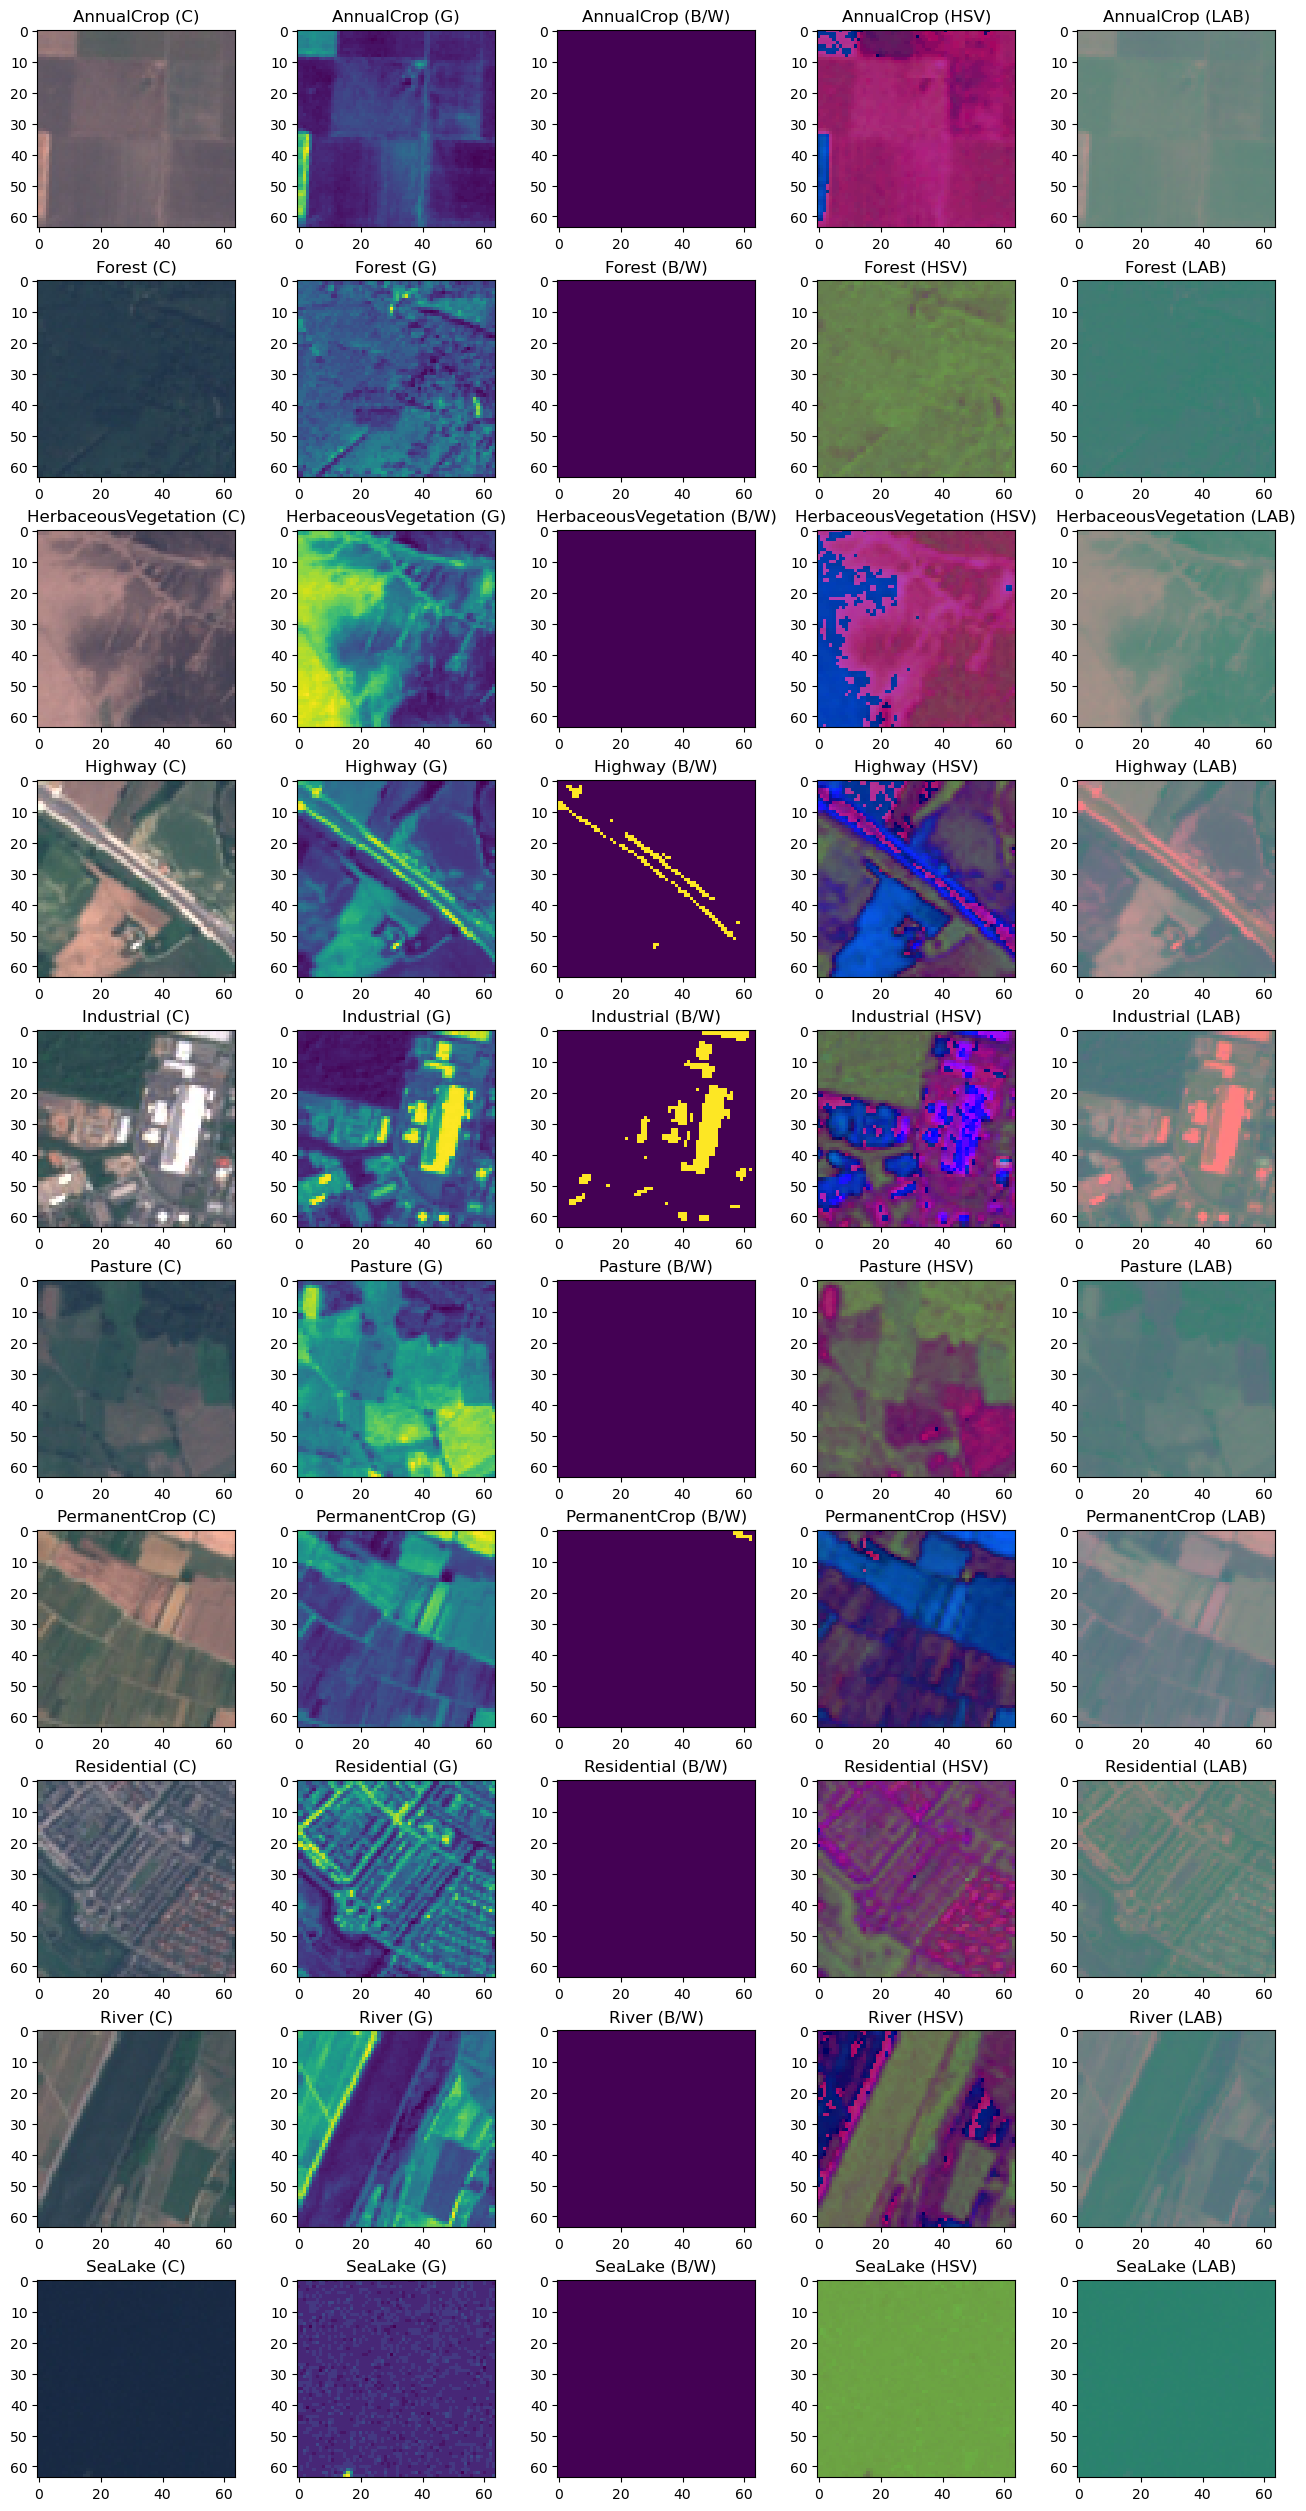

In [21]:
_, axs = plt.subplots(10, 5, figsize=(13,25), layout="constrained")
axs = axs.flatten()

for i, cat in enumerate(categories):
	files = os.listdir(base_path + "/" + cat)
	image = imread(base_path + "/" + cat + "/" + files[0])
	
	axs[i*5 + 0].imshow(image)
	axs[i*5 + 1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
	axs[i*5 + 2].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) > 256*0.75)
	axs[i*5 + 3].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV))
	axs[i*5 + 4].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2LAB))
    
	axs[i*5 + 0].set_title(f"{cat} (C)")
	axs[i*5 + 1].set_title(f"{cat} (G)")
	axs[i*5 + 2].set_title(f"{cat} (B/W)")
	axs[i*5 + 3].set_title(f"{cat} (HSV)")
	axs[i*5 + 4].set_title(f"{cat} (LAB)")
	
plt.show()

As previously mentioned, the original images are in 3 spectral bands (RGB). A good representation of the color data is to use a histogram, this way we can visualize the color distribution and decide to apply different color features.

In [ ]:
_, axs = plt.subplots(10, 3, figsize=(8, 20), layout="constrained")
axs = axs.flatten()

for i, cat in enumerate(categories):
    files = os.listdir(base_path + "/" + cat)
    image = imread(base_path + "/" + cat + "/" + files[0])
    
    r_vals = image[:, :, 0].flatten()
    g_vals = image[:, :, 1].flatten()
    b_vals = image[:, :, 2].flatten()
    
    r_ax = axs[i*3 + 0]  
    g_ax = axs[i*3 + 1]  
    b_ax = axs[i*3 + 2]  
    
    r_ax.hist(r_vals, bins=256, color='red')
    g_ax.hist(g_vals, bins=256, color='green')
    b_ax.hist(b_vals, bins=256, color='blue')
    
    r_ax.set_title(f"{cat} (R)")
    g_ax.set_title(f"{cat} (G)")
    b_ax.set_title(f"{cat} (B)")

plt.show()

And to end up, it's essential to know how the dataset is distributed and populated. In this particular dataset, all categories have between 2000 and 3000 images, this important difference indicates that the dataset is not quite balanced. Maybe it would be interesting to take this into account when dealing with the train, test splits.

In [ ]:
sizes = []
length = {}

for cat in categories:
	files = os.listdir(base_path + cat + "/")
	print(files)
	length[cat] = len(files)
	for image in files:
		im = imread(base_path + cat + "/" + image)
		shape = im.shape
		if shape not in sizes:
			sizes.append(shape)

print(sizes)
print(length)